<h1><center>
Prediction for Mutual Fund Returns
</center></h1>

# Project Description

## Our client is a fund management firm

- The firm aims to develop a robust machine learning model to predict
the returns of a mutual fund after a 3-year investment period.
- Will it be High or Low?

## Current Practice

Traditional investment analysis techniques fall short in accurately forecasting mutual fund performance due to their reliance on historical data and qualitative factors.



## Our Role as Consultants

- We intend to leverage machine learning's power to process extensive data and uncover hidden patterns, enhancing our investment decision-making.

- With a tailored predictive model, we strive to provide clients with valuable insights for informed investment choices.

## Problem Specifics
Deliverable: <b> Predict whether an investment will give High or Low returns. </b> <br>
Machine learning task: <b> Classification </b> <br>
Target variable: <b> Return_3yr(Tagret Category) [High Return / Low Return] </b> <br>
Model win condition: <b> Accuracy (Baseline Acc. is 90%)

# Data Description

- Scheme Name: Name of the mutual fund scheme
- Min sip: Min sip amount required to start
- Min lumpsum: Min lumpsum amount required to start. A larger amount that is invested in one go
- Expense ratio: calculated as a percentage of the Scheme's average Net Asset Value (NAV). Its basically the commission
- Fund size: the total amount of money that a mutual fund manager must oversee and invest
- Fund age: years since inception of scheme
- Fund manager: A fund manager is responsible for implementing a fund's investment strategy and managing its trading activities. (Remove)
- Sortino : Sortino ratio measures the risk-adjusted return of an investment asset, portfolio, or strategy
- Alpha: Alpha is the excess returns relative to market benchmark for a given amount of risk taken by the scheme
- Standard deviation: A standard deviation is a number that can be used to show how much the returns of a mutual fund scheme are likely to deviate from its average annual returns
- Beta: Beta in a mutual fund is often used to convey the fund's volatility (gains or losses) in relation to its respective benchmark index
- Sharpe: Sharpe Ratio of a mutual fund reveals its potential risk-adjusted returns
- Risk level: <br>
    1- Low risk <br>
    2- Low to moderate <br>
    3- Moderate <br>
    4- Moderately High <br>
    5- High <br>
    6- Very High
- AMC name: Mutual fund house managing the assets
- Rating: 0-5 rating assigned to scheme
- Category: The category to which the mutual fund belongs (e.g. equity, debt, hybrid)
- Sub-category : It includes category like Small cap, Large cap, ELSS, etc.
- Return_3yr(Tagret Category): The return type of the mutual fund scheme over 3 year
   1- High Return
   0- Low Return

In [1]:
#!pip install -q pandas-profiling              # Toolbox for Generating Statistics Report
#!pip install -q --upgrade pandas-profiling

# The above commands have changed to the ones below.

!pip install ydata-profiling
!pip install --upgrade ydata-profiling

!pip install ydata-profiling
!pip install --upgrade ydata-profiling


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 31.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=48b2bdee55044cb0823a0dc30ee05eb2a7d46a4336fee101d8eb718c625089df
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninst

In [2]:
#importing packages needed for data retrieval and basic data vieweing

# For Panel Data Analysis
import pandas as pd

#import pandas_profiling
#from pandas_profiling import ProfileReport
# The above commands have changed to the ones below
import ydata_profiling
from ydata_profiling import ProfileReport

import pandas.testing as tm
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

# For Numerical Python
import numpy as np


# For datetime
from datetime import datetime as dt

# For Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For metrics evaluation
#from sklearn.metrics import precision_recall_curve, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")

# For Data Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

<h1><center>
Long look at Data Set and Data cleaning
</center></h1>

In [3]:
mf_data_orig = pd.read_csv("https://gitlab.com/accredian/insaid-data/-/raw/main/PGP%20Job%20G%20Session%20Repo/2023/May'23/Project%20Data/processed_df.csv?ref_type=heads")
# Intend to keep original dataframe, because dataset is small. Would have avoided _orig if the dataset was big
mf_data_orig.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,Unnamed: 17,returns_3yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir Growth,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,NaN,Low Return
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,NaN,Low Return
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,NaN,High Return
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,NaN,Low Return
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,NaN,High Return


In [4]:
# Lets look at data set

print(mf_data_orig.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  Unnamed: 17    0 non-null      float64
 18  returns_3y

In [5]:
mf_data_orig['Unnamed: 17'].unique()

array([nan])

The columns that are redundant <br>
'fund_manager' and 'Unnamed: 17'<br>
Hence we will drop them

In [6]:
mf_data = mf_data_orig.drop(columns=['fund_manager','Unnamed: 17'], axis=1)
mf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   sortino        814 non-null    object 
 7   alpha          814 non-null    object 
 8   sd             814 non-null    object 
 9   beta           814 non-null    object 
 10  sharpe         814 non-null    object 
 11  risk_level     814 non-null    int64  
 12  amc_name       814 non-null    object 
 13  rating         814 non-null    int64  
 14  category       814 non-null    object 
 15  sub_category   814 non-null    object 
 16  returns_3yr    814 non-null    object 
dtypes: float64(2), int64(5), object(10)
memory usage: 108.

Next we try to choose between variables <br>
'scheme_name' and 'amc_name'

In [7]:
print(mf_data['scheme_name'].nunique())
mf_data['scheme_name'].unique()

789


array(['Aditya Birla SL Active Debt Multi-Mgr FoF-Dir Growth',
       'Aditya Birla SL Arbitrage Fund',
       'Aditya Birla SL Asset Allocator FoF-Dir Growth',
       'Aditya Birla SL Bal Bhavishya Yojna – Dir Growth',
       'Aditya Birla SL Balanced Advantage Fund',
       'Aditya Birla SL Banking&Financial Services-DirGrowth',
       'Aditya Birla SL Banking&PSU Debt Fund',
       'Aditya Birla SL CEF – Global Agri Plan-Direct Growth',
       'Aditya Birla SL Corporate Bond Fund',
       'Aditya Birla SL Credit Risk Fund',
       'Aditya Birla SL Digital India Fund',
       'Aditya Birla SL Dividend Yield Fund',
       'Aditya Birla SL Dynamic Bond Fund',
       'Aditya Birla SL Equity Advantage Fund',
       'Aditya Birla SL Equity Hybrid ’95 Fund',
       'Aditya Birla SL Equity Savings Fund',
       'Aditya Birla SL Flexi Cap Fund',
       'Aditya Birla SL Floating Rate Fund',
       'Aditya Birla SL Focused Equity Fund',
       'Aditya Birla SL FP FoF – Aggressive – Direct Grow

In [8]:
print(mf_data['amc_name'].nunique())
mf_data['amc_name'].unique()

39


array(['Aditya Birla Sun Life Mutual Fund', 'Axis Mutual Fund',
       'Bandhan Mutual Fund', 'Bank of India Mutual Fund',
       'Baroda BNP Paribas Mutual Fund', 'Edelweiss Mutual Fund',
       'Canara Robeco Mutual Fund', 'DSP Mutual Fund',
       'Franklin Templeton Mutual Fund', 'HDFC Mutual Fund',
       'HSBC Mutual Fund', 'ICICI Prudential Mutual Fund',
       'IDBI Mutual Fund', 'IIFL Mutual Fund', 'Indiabulls Mutual Fund',
       'Invesco Mutual Fund', 'ITI Mutual Fund',
       'JM Financial Mutual Fund', 'Kotak Mahindra Mutual Fund',
       'L&T Mutual Fund', 'LIC Mutual Fund',
       'Mahindra Manulife Mutual Fund', 'Mirae Asset Mutual Fund',
       'Motilal Oswal Mutual Fund', 'Navi Mutual Fund',
       'Nippon India Mutual Fund', 'PPFAS Mutual Fund',
       'PGIM India Mutual Fund', 'Quant Mutual Fund',
       'Quantum Mutual Fund', 'SBI Mutual Fund', 'Shriram Mutual Fund',
       'Sundaram Mutual Fund', 'Tata Mutual Fund', 'Taurus Mutual Fund',
       'Trust Mutual Fund'

- The column 'amc_name' is redundant, because all these names are covered in the 'broader' variable 'scheme_name' <br>
- I have manually checked the list
- Ideally, in a real project, of course, I would write a string based code to check if the names tally. For now, I am bypassing it.  <br>
<br><br>
I am dropping 'amc_name'

In [9]:
mf_data1 = mf_data.drop(columns=['amc_name'], axis=1)
#mf_data.info()
mf_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   sortino        814 non-null    object 
 7   alpha          814 non-null    object 
 8   sd             814 non-null    object 
 9   beta           814 non-null    object 
 10  sharpe         814 non-null    object 
 11  risk_level     814 non-null    int64  
 12  rating         814 non-null    int64  
 13  category       814 non-null    object 
 14  sub_category   814 non-null    object 
 15  returns_3yr    814 non-null    object 
dtypes: float64(2), int64(5), object(9)
memory usage: 101.9+ KB


On careful look through the knowhow of Mutual Funds in the internet,<br>
I find that all of the following variables should be numerical, whle they are marked as objects in the data <br>
- sortino
- alpha
- sd
- beta
- sharpe

Looking through the dataset I find that each of those variables have '-' as values, which is causing the problem. <br>
<br>
So, I change the variables' type to numerical while replacing '-' with NaN

In [10]:
mf_data1['sortino'] = pd.to_numeric(mf_data1['sortino'], errors='coerce')
mf_data1['alpha'] = pd.to_numeric(mf_data1['alpha'], errors='coerce')
mf_data1['sd'] = pd.to_numeric(mf_data1['sd'], errors='coerce')
mf_data1['beta'] = pd.to_numeric(mf_data1['beta'], errors='coerce')
mf_data1['sharpe'] = pd.to_numeric(mf_data1['sharpe'], errors='coerce')

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating
count,814.000000,814.000000,814.000000,814.000000,814.000000,791.000000,772.000000,790.000000,772.000000,791.000000,814.000000,814.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.652642,2.505635,10.272696,0.822241,1.204185,4.400491,2.641278
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.392228,3.951573,7.805667,1.309871,0.536431,1.814741,1.463476
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,1.000000,0.000000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.750000,0.530000,2.162500,0.700000,0.930000,3.000000,2.000000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.870000,1.855000,12.300000,0.860000,1.290000,6.000000,3.000000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.470000,3.847500,16.437500,0.970000,1.550000,6.000000,4.000000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,6.000000,5.000000


In [11]:
mf_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   sortino        791 non-null    float64
 7   alpha          772 non-null    float64
 8   sd             790 non-null    float64
 9   beta           772 non-null    float64
 10  sharpe         791 non-null    float64
 11  risk_level     814 non-null    int64  
 12  rating         814 non-null    int64  
 13  category       814 non-null    object 
 14  sub_category   814 non-null    object 
 15  returns_3yr    814 non-null    object 
dtypes: float64(7), int64(5), object(4)
memory usage: 101.9+ KB


And, in the next step the "Nan"s are replaced by the medians of the respective columns.

In [12]:
mf_data1['sortino'] = mf_data1['sortino'].fillna(mf_data1['sortino'].median())
mf_data1['alpha'] = mf_data1['alpha'].fillna(mf_data1['alpha'].median())
mf_data1['sd'] = mf_data1['sd'].fillna(mf_data1['sd'].median())
mf_data1['beta'] = mf_data1['beta'].fillna(mf_data1['beta'].median())
mf_data1['sharpe'] = mf_data1['sharpe'].fillna(mf_data1['sharpe'].median())

mf_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   sortino        814 non-null    float64
 7   alpha          814 non-null    float64
 8   sd             814 non-null    float64
 9   beta           814 non-null    float64
 10  sharpe         814 non-null    float64
 11  risk_level     814 non-null    int64  
 12  rating         814 non-null    int64  
 13  category       814 non-null    object 
 14  sub_category   814 non-null    object 
 15  returns_3yr    814 non-null    object 
dtypes: float64(7), int64(5), object(4)
memory usage: 101.9+ KB


In [13]:
mf_data1.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,2.658784,2.472064,10.332469,0.824189,1.206609,4.400491,2.641278
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.372866,3.850843,7.697244,1.275615,0.528980,1.814741,1.463476
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,1.000000,0.000000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,1.810000,0.570000,2.222500,0.710000,0.932500,3.000000,2.000000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,2.870000,1.855000,12.300000,0.860000,1.290000,6.000000,3.000000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,3.460000,3.727500,16.397500,0.960000,1.540000,6.000000,4.000000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,6.000000,5.000000


<Axes: >

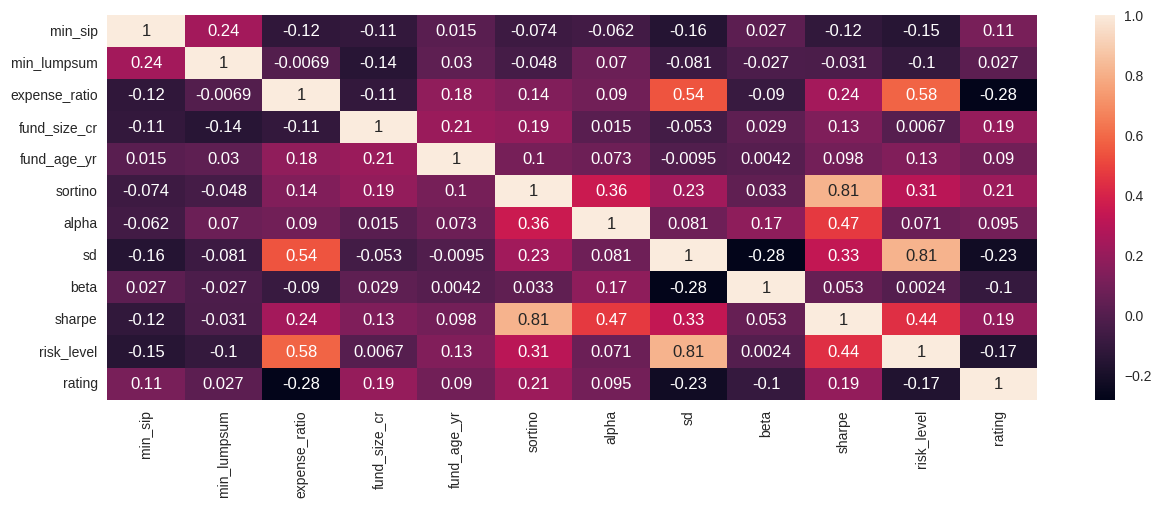

In [36]:
plt.figure(figsize=(15,5))
sns.heatmap(mf_data1.corr(),annot=True)

The variables sharpe and sortino are correlated <br>
The variables sd and risk_level are correlated <br>
<br>

Heads-Up: For now, with limited financial knowledge, I am keeping them. But with more research, I shall redo the analysis, after removing one of each of these two pairs.

<h1><center>
Exploratory Data Analysis
</center></h1>

Lets check out the influence of the categorical variables

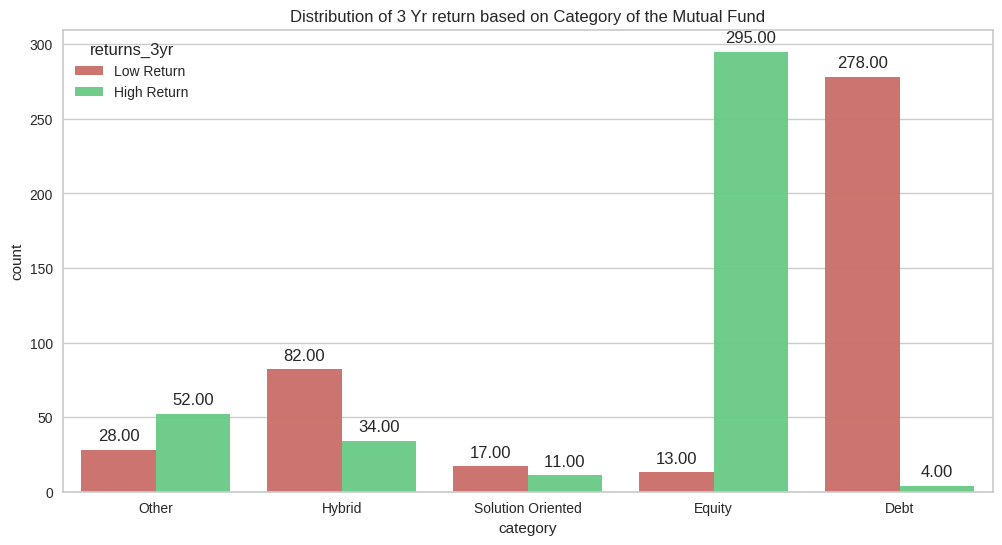

In [52]:
fig, axis1 = plt.subplots(1,1,figsize=(12,6))
splot = sns.countplot(x='category', hue='returns_3yr', data=mf_data1, palette=['#DB5E56','#56DB7F'], alpha = 0.95);
plt.title('Distribution of 3 Yr return based on Category of the Mutual Fund');
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), \
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [53]:
hmf = mf_data1[(mf_data1['category']=='Equity')|(mf_data1['category']=='Other')]

<br>I want to show the distribution of the sub-categories that promise relatively more High Returns<br>

In [62]:
hmf['sub_category'].nunique()

15

Text(0.5, 1.0, 'Donut Plot showing the proportion of each sub_Category value')

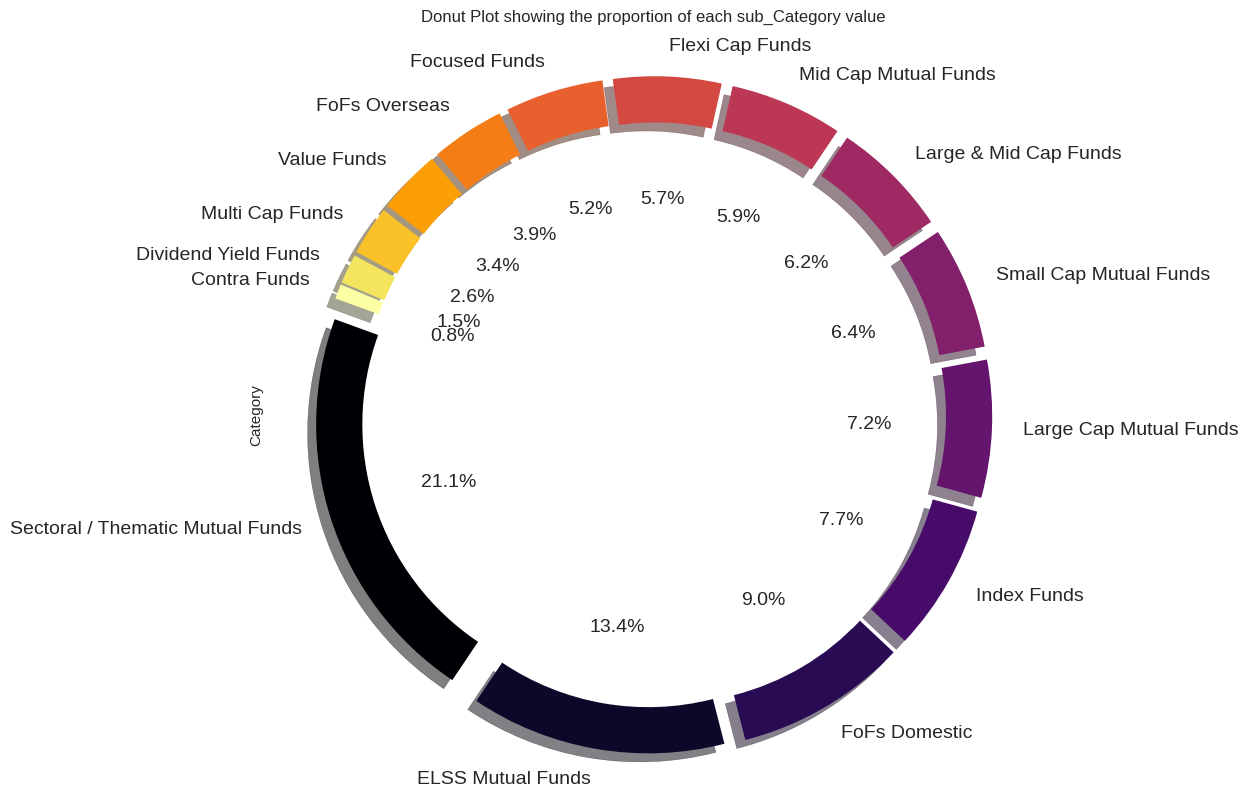

In [64]:
space = np.ones(15)/10
hmf['sub_category'].value_counts().plot(kind='pie', explode=space, fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15),
                                       shadow=True, startangle=160, figsize=(10,10), cmap='inferno', legend=False)

plt.ylabel('Category')
plt.title('Donut Plot showing the proportion of each sub_Category value')

Another step that I want to do later <br>

Among these find the sub-categories which have NO Low Returns <br><br>

In [ ]:
# Expand from/around this cell (and next) to find the Mutual Fund sub-categories that have guranteed High returns.
#(mf_data1[mf_data1['returns_3yr']=='Low Return']['sub_category'].value_counts())/ (mf_data1[mf_data1['returns_3yr']=='High Return']['sub_category'].value_counts())

In [65]:
hmf['returns_3yr'].value_counts()

High Return    347
Low Return      41
Name: returns_3yr, dtype: int64

<br> <br>
Lets look at insights from the numerical variables<br>
<br>

In [67]:
mf_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   sortino        814 non-null    float64
 7   alpha          814 non-null    float64
 8   sd             814 non-null    float64
 9   beta           814 non-null    float64
 10  sharpe         814 non-null    float64
 11  risk_level     814 non-null    int64  
 12  rating         814 non-null    int64  
 13  category       814 non-null    object 
 14  sub_category   814 non-null    object 
 15  returns_3yr    814 non-null    object 
dtypes: float64(7), int64(5), object(4)
memory usage: 101.9+ KB


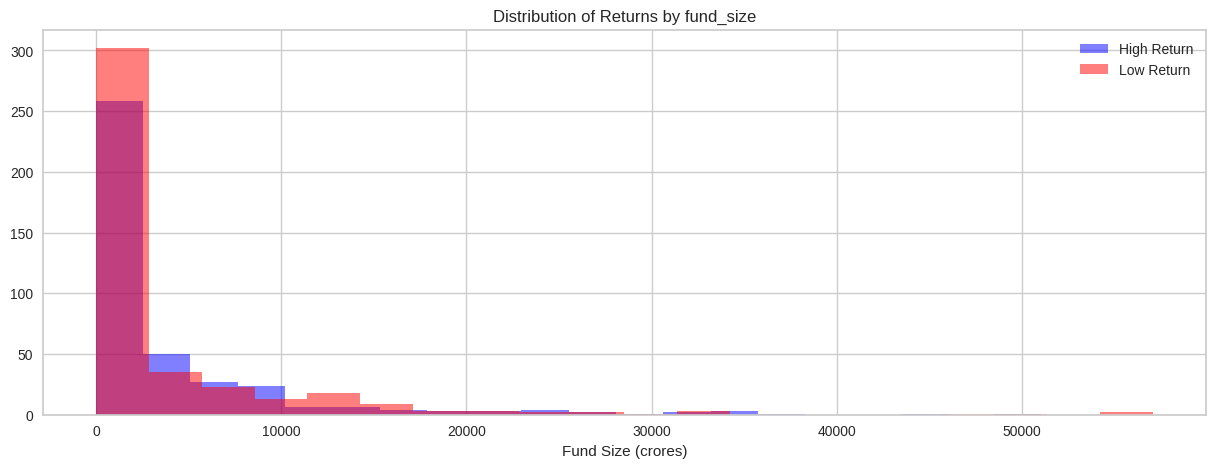

In [71]:
plt.figure(figsize=(15,5))
plt.hist('fund_size_cr', data=mf_data1[mf_data1['returns_3yr'] == 'High Return'], bins = 20, alpha=0.5, label='High Return', color='blue');
plt.hist('fund_size_cr', data=mf_data1[mf_data1['returns_3yr'] == 'Low Return'], bins = 20, alpha=0.5, label='Low Return', color='red');
plt.title('Distribution of Returns by fund_size');
plt.xlabel('Fund Size (crores)');
plt.legend();

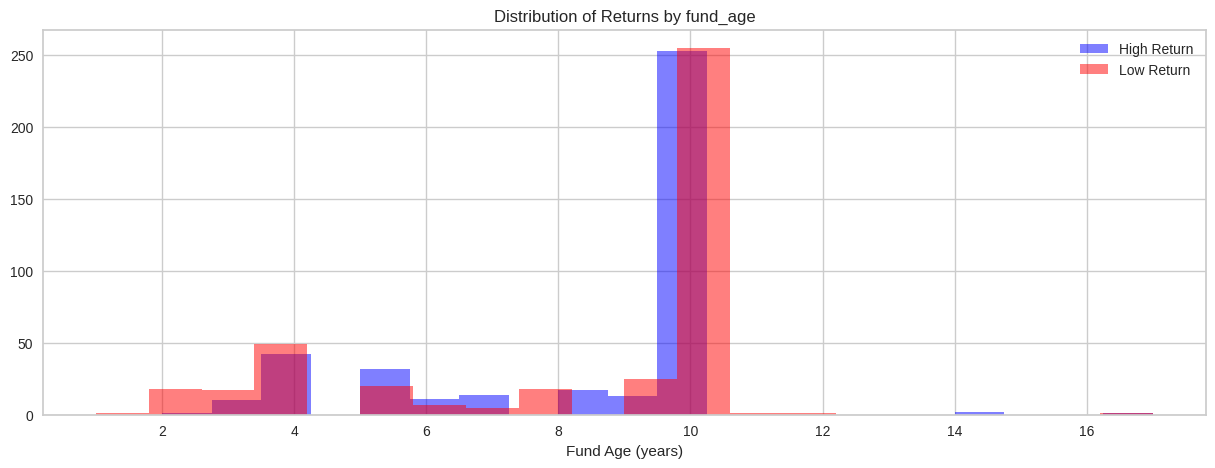

In [69]:
plt.figure(figsize=(15,5))
plt.hist('fund_age_yr', data=mf_data1[mf_data1['returns_3yr'] == 'High Return'], bins = 20, alpha=0.5, label='High Return', color='blue');
plt.hist('fund_age_yr', data=mf_data1[mf_data1['returns_3yr'] == 'Low Return'], bins = 20, alpha=0.5, label='Low Return', color='red');
plt.title('Distribution of Returns by fund_age');
plt.xlabel('Fund Age (years)');
plt.legend();

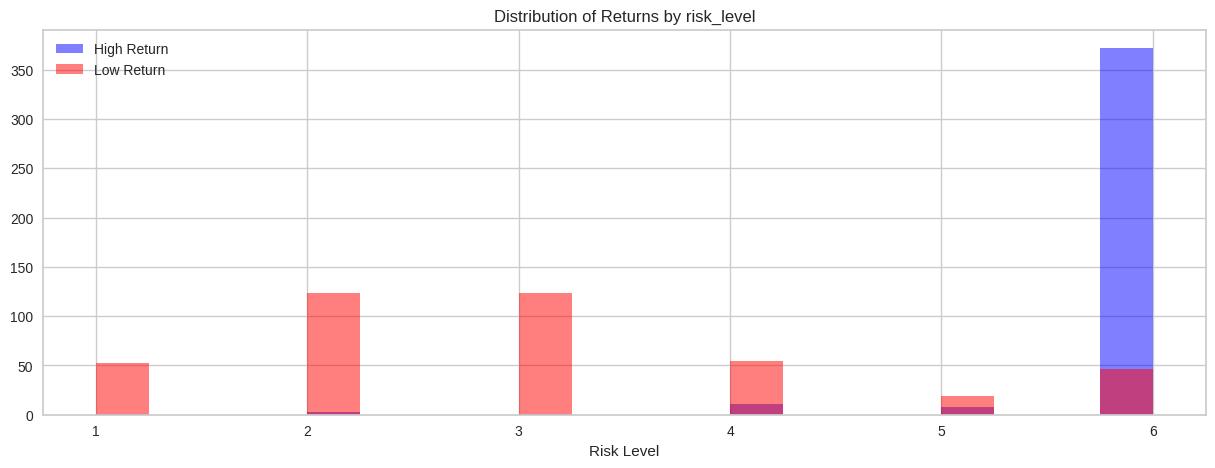

In [72]:
plt.figure(figsize=(15,5))
plt.hist('risk_level', data=mf_data1[mf_data1['returns_3yr'] == 'High Return'], bins = 20, alpha=0.5, label='High Return', color='blue');
plt.hist('risk_level', data=mf_data1[mf_data1['returns_3yr'] == 'Low Return'], bins = 20, alpha=0.5, label='Low Return', color='red');
plt.title('Distribution of Returns by risk_level');
plt.xlabel('Risk Level');
plt.legend();

<h1><center>
Conclusions from Exploratory Data Analysis
</center></h1>

- The Categories that we found to have high returns are Equity and 'Others'
- We have shown the sub-categories that give relatively high return.
- Analysis remains to be done: which sub-categories have guranteed High Retun (no Low Return)
- Fund ages between 6-9 years are better, beyond 10 years the the schemes do not show advantage (more Low return)
- As expected - high risk funds yeild more benefit



<h1><center>
Machine Learning Modeling
</center></h1>

In [14]:
mf_data = mf_data1.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mf_data['returns_3yr']=le.fit_transform(mf_data['returns_3yr'])
mf_data['returns_3yr'].dtype

dtype('int64')

In [16]:
num = ['min_sip', 'min_lumpsum', 'expense_ratio', 'fund_size_cr', 'fund_age_yr', 'sortino', 'alpha', 'sd', 'beta', 'sharpe', 'risk_level', 'rating']

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
mf_data[(num)]=scaler.fit_transform(mf_data[(num)])

In [18]:
X = mf_data.drop(columns=['returns_3yr'], axis=1) # dropping the redundant variables
Y = mf_data['returns_3yr'] # Choosing the target variable

In [19]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [20]:
from category_encoders import OneHotEncoder
oe = OneHotEncoder( handle_unknown='ignore',cols=['scheme_name', 'category','sub_category'])
X = oe.fit_transform(X)

In [21]:
print(X.shape)
print(Y.shape)

(814, 844)
(814,)


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
!pip install fastapi
!pip install python-multipart
!pip install uvicorn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 11.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 950.4 kB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58

In [24]:
!pip install fastapi
!pip install python-multipart
!pip install uvicorn

In [25]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 33.3 MB/s eta

In [26]:
from pycaret.classification import *

In [27]:
clf1 = setup(data = mf_data,
          target = 'returns_3yr')

,Description,Value
0,Session id,7852
1,Target,returns_3yr
2,Target type,Binary
3,Original data shape,"(814, 16)"
4,Transformed data shape,"(814, 20)"
5,Transformed train set shape,"(569, 20)"
6,Transformed test set shape,"(245, 20)"
7,Numeric features,12
8,Categorical features,3
9,Preprocess,True


In [28]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9456,0.9784,0.9349,0.9586,0.9461,0.8912,0.8925,0.4830
lr,Logistic Regression,0.9438,0.9779,0.9314,0.9582,0.9442,0.8876,0.8887,0.8370
rf,Random Forest Classifier,0.9333,0.9803,0.9693,0.9096,0.9378,0.8661,0.8698,0.5460
ridge,Ridge Classifier,0.9263,0.0000,0.9006,0.9538,0.9257,0.8526,0.8550,0.3280
knn,K Neighbors Classifier,0.9210,0.9690,0.8871,0.9581,0.9190,0.8422,0.8478,0.2180
nb,Naive Bayes,0.9122,0.9582,0.8528,0.9732,0.9070,0.8249,0.8337,0.2070
svm,SVM - Linear Kernel,0.9068,0.0000,0.9176,0.9057,0.9101,0.8132,0.8163,0.2120
xgboost,Extreme Gradient Boosting,0.8982,0.9507,0.8526,0.9460,0.8953,0.7967,0.8031,0.1420
gbc,Gradient Boosting Classifier,0.8981,0.9470,0.8560,0.9400,0.8942,0.7965,0.8020,0.3830
ada,Ada Boost Classifier,0.8261,0.9434,0.7299,0.9166,0.8065,0.6541,0.6730,0.6060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=7852, verbose=0, warm_start=False)

In [29]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5,scoring='f1')
    print("Cross validation(F1) is",np.mean(score)*100)

In [30]:
model=LogisticRegression()

In [31]:
classify(model, X, Y)

y_train_pred_count = model.predict(x_train)
y_test_pred_count = model.predict(x_test)

report_train = classification_report(y_train, y_train_pred_count)
report_test = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(report_train)
print('                    Testing Report           ')
print(report_test)

Accuracy is 94.47852760736197
Cross validation(F1) is 94.1996172413356
                    Training Report          
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       314
           1       0.99      0.98      0.98       337

    accuracy                           0.98       651
   macro avg       0.98      0.98      0.98       651
weighted avg       0.98      0.98      0.98       651

                    Testing Report           
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        82
           1       0.96      0.93      0.94        81

    accuracy                           0.94       163
   macro avg       0.95      0.94      0.94       163
weighted avg       0.95      0.94      0.94       163



In [34]:
f_imp = pd.Series(model.feature_importances_)
f_imp.index = x_train.columns
f_imp.sort_values(ascending=False).plot.bar(figsize=(24, 8))

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [32]:
def plot_precision_recall(y_true, y_pred, train_or_test):
  '''
  y_true: Acutal values of the target
  y_pred: Predicted values of the target. Either predict_proba or decision_function
  line_show: Plot avergae values "precision" or "recall"
  train_or_test: Train Data or Test Data
  '''
  precisions, recalls, thresholds = precision_recall_curve(y_true = y_true, probas_pred = y_pred)

  average_precision = np.mean(precisions)
  average_recall = np.mean(recalls)

  sns.lineplot(x = recalls, y = precisions, linewidth = 2, ci = None)
  plt.plot([0, 1], [average_precision, average_precision], 'r-')
  plt.plot([average_recall, average_recall], [0, 1], 'g-')
  plt.xlabel('Recall', fontsize = 14)
  plt.xticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.yticks(ticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
  plt.ylabel('Precision', fontsize = 14)
  plt.title(train_or_test, fontsize = 16)
  plt.legend(labels = ['Binary PR Curve', 'AP {:.2f}'.format(average_precision), 'AR {:.2f}'.format(average_recall)])
  plt.grid(True)

TypeError: ConfusionMatrixDisplay.__init__() got an unexpected keyword argument 'estimator'

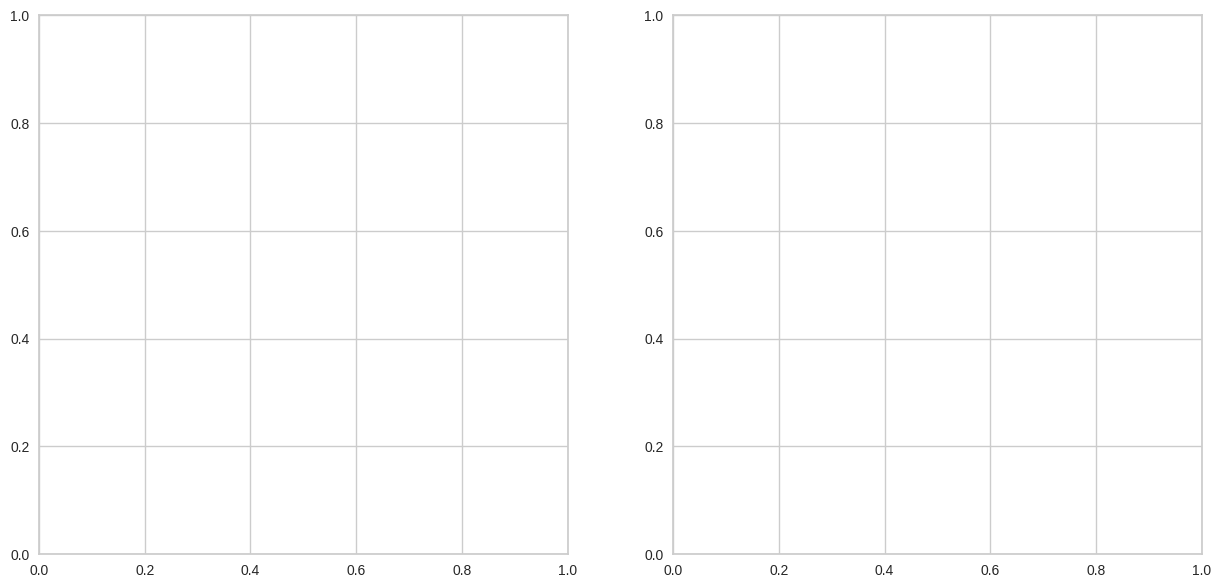

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize=(15, 7))
ConfusionMatrixDisplay(estimator = model, X = x_train, y_true = y_train, values_format = '.7g', cmap = 'YlGnBu', ax = ax1)
ConfusionMatrixDisplay(estimator = model, X = x_test, y_true = y_test, values_format = '.7g', cmap = 'YlGnBu', ax = ax2)
ax1.set_title(label = 'Train Data', size = 14)
ax2.set_title(label = 'Test Data', size = 14)
ax1.grid(b = False)
ax2.grid(b = False)
plt.suptitle(t = 'Confusion Matrix', size = 16)
plt.show()